In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [2]:
udemy_orig = pd.read_csv('udemy_courses.csv')
udemy_orig.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Primera revisión de los datos

In [3]:
udemy_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


El dataset no contiene valores nulos

In [4]:
udemy_orig.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Contiene 6 datos duplicados, que se eliminan.

In [5]:
udemy_orig.num_subscribers.value_counts()

0       70
1       49
5       28
2       27
3       26
        ..
4449     1
6039     1
1522     1
96       1
901      1
Name: num_subscribers, Length: 2197, dtype: int64

In [6]:
udemy_orig.duplicated().sum()

6

In [7]:
udemy_wo_dups = udemy_orig.drop_duplicates()

A continuación quito el mayor valor de la columna 'num_subscribers', ya que no sólo altera los gráficos, sino que se refiere a la cantidad de suscriptores al curso gratuito de web developement

In [8]:
udemy_wo_dups['z_score']=stats.zscore(udemy_wo_dups['num_subscribers'])
udemy_wo_dups= udemy_wo_dups.loc[udemy_wo_dups['z_score'].abs()<=3]

/tmp/ipykernel_18649/383959374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_wo_dups['z_score']=stats.zscore(udemy_wo_dups['num_subscribers'])


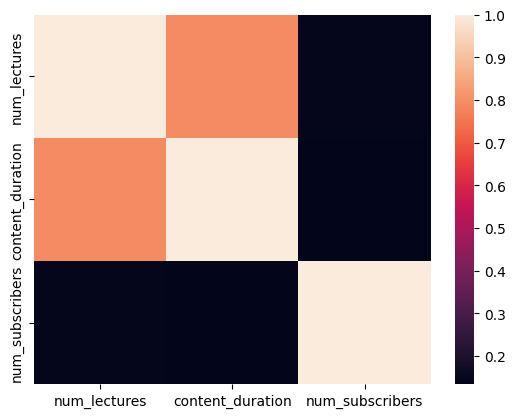

In [9]:
sns.heatmap(udemy_wo_dups[['num_lectures', 'content_duration', 'num_subscribers']].corr())
plt.show()

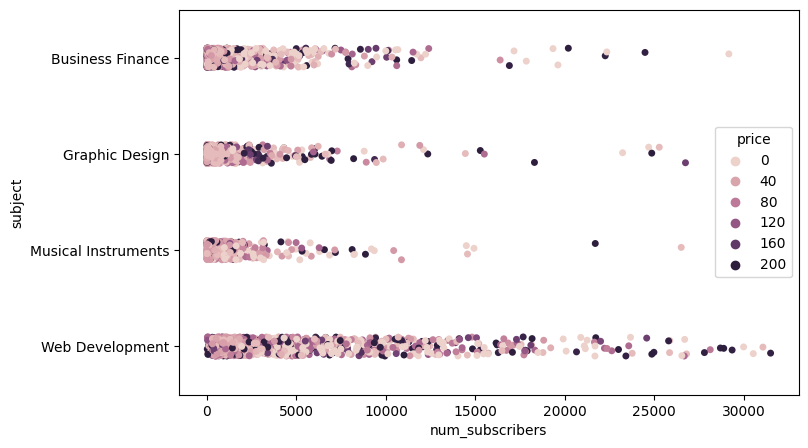

In [10]:
sns.set_palette("bright")
sns.stripplot(data=udemy_wo_dups, x="num_subscribers", y="subject", hue='price' )
plt.gcf().set_size_inches(8, 5)

Se observa claramente que la gran mayoría de los suscriptores esta en los niveles introductorios y en los cursos que abarcan todos los niveles.

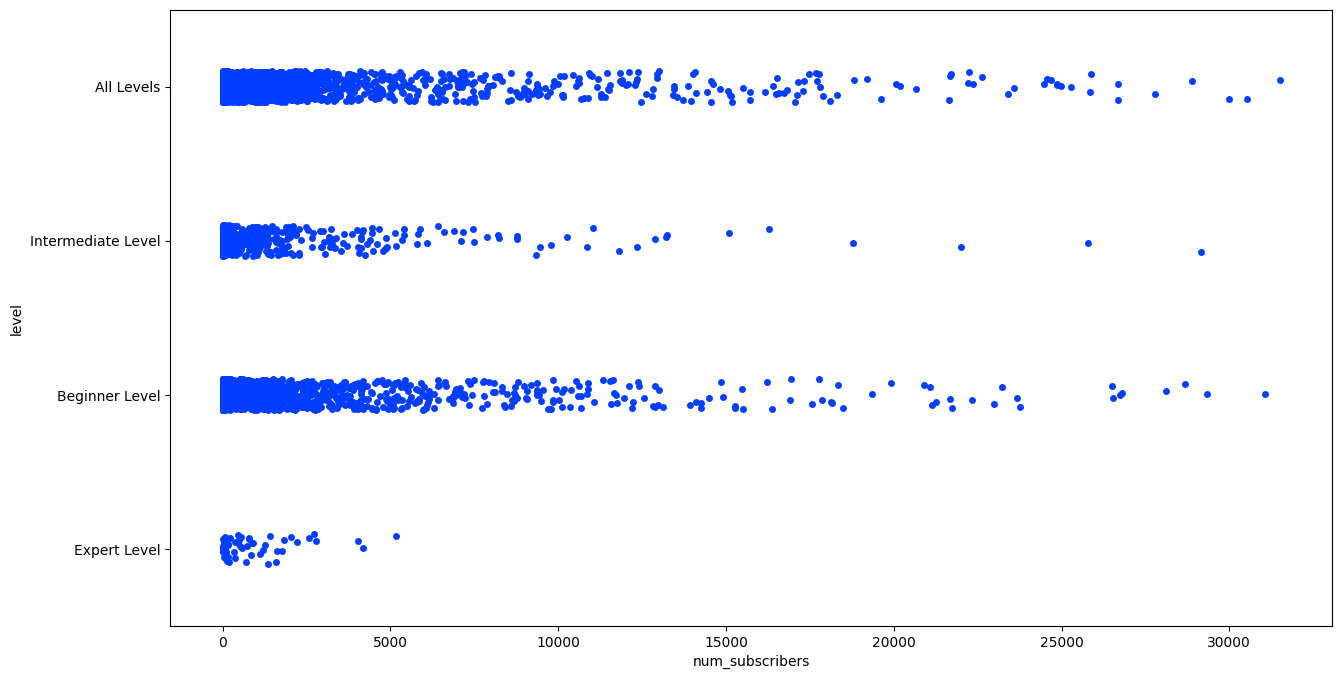

In [11]:
sns.stripplot(data=udemy_wo_dups, x='num_subscribers', y="level")
plt.gcf().set_size_inches(15, 8)

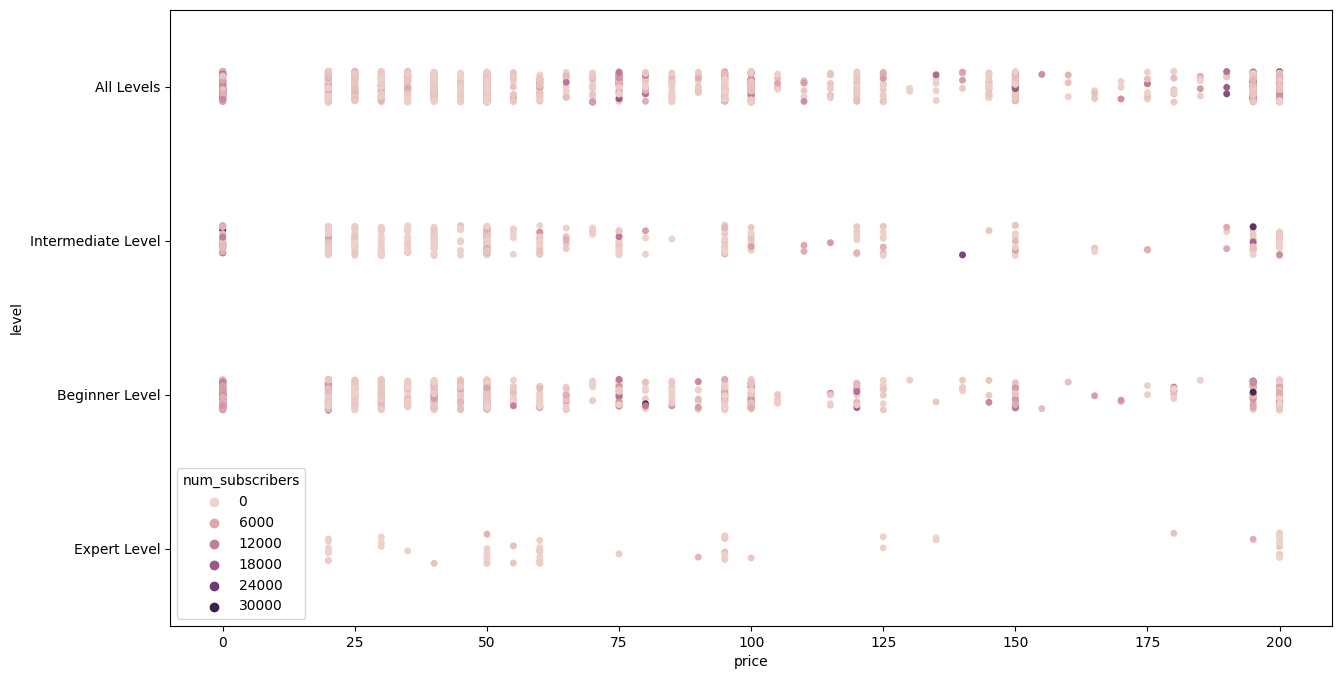

In [12]:
sns.stripplot(data=udemy_wo_dups, x='price', y="level", hue= 'num_subscribers')
plt.gcf().set_size_inches(15, 8)

Wordloud

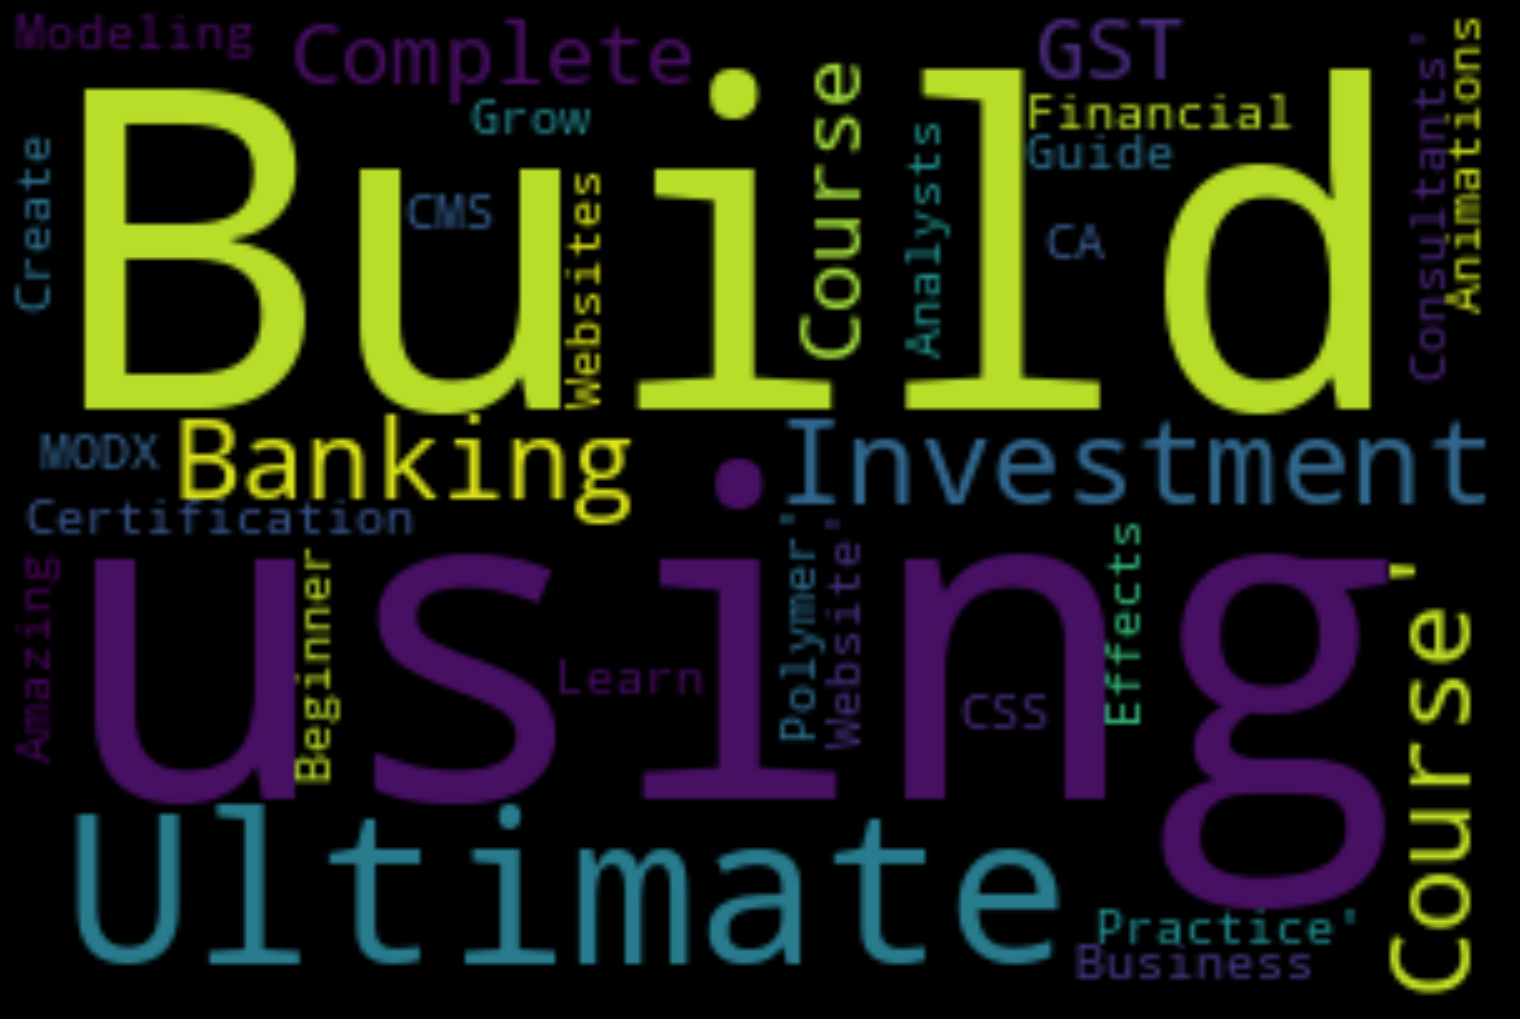

In [13]:

text = udemy_wo_dups.course_title.values
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("udemyword_cloud.png") 
plt.show()

In [14]:
udemy_wo_dups['subject'].value_counts()

Business Finance       1188
Web Development        1163
Musical Instruments     676
Graphic Design          597
Name: subject, dtype: int64

In [15]:
udemy_wo_dups['published_timestamp'] = pd.to_datetime(udemy_wo_dups['published_timestamp'])

In [16]:
udemy_wo_dups.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,z_score
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,-0.110004
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,-0.042015
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,-0.107158
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,-0.077959
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,-0.201816


In [17]:
udemy_wo_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3624 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3624 non-null   int64              
 1   course_title         3624 non-null   object             
 2   url                  3624 non-null   object             
 3   is_paid              3624 non-null   bool               
 4   price                3624 non-null   int64              
 5   num_subscribers      3624 non-null   int64              
 6   num_reviews          3624 non-null   int64              
 7   num_lectures         3624 non-null   int64              
 8   level                3624 non-null   object             
 9   content_duration     3624 non-null   float64            
 10  published_timestamp  3624 non-null   datetime64[ns, UTC]
 11  subject              3624 non-null   object             
 12  z_score             

In [18]:
udemy_wo_dups['date'] = pd.to_datetime(udemy_wo_dups["published_timestamp"]).dt.date
udemy_wo_dups

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,z_score,date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,-0.110004,2017-01-18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,-0.042015,2017-03-09
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,-0.107158,2016-12-19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,-0.077959,2017-05-30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,-0.201816,2016-12-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,-0.226692,2016-06-14
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,-0.304063,2017-03-10
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,-0.282243,2015-12-30
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,-0.304695,2016-08-11


In [19]:
udemy_wo_dups['date'] = pd.to_datetime(udemy_wo_dups["date"])


In [20]:
udemy_wo_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3624 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3624 non-null   int64              
 1   course_title         3624 non-null   object             
 2   url                  3624 non-null   object             
 3   is_paid              3624 non-null   bool               
 4   price                3624 non-null   int64              
 5   num_subscribers      3624 non-null   int64              
 6   num_reviews          3624 non-null   int64              
 7   num_lectures         3624 non-null   int64              
 8   level                3624 non-null   object             
 9   content_duration     3624 non-null   float64            
 10  published_timestamp  3624 non-null   datetime64[ns, UTC]
 11  subject              3624 non-null   object             
 12  z_score             

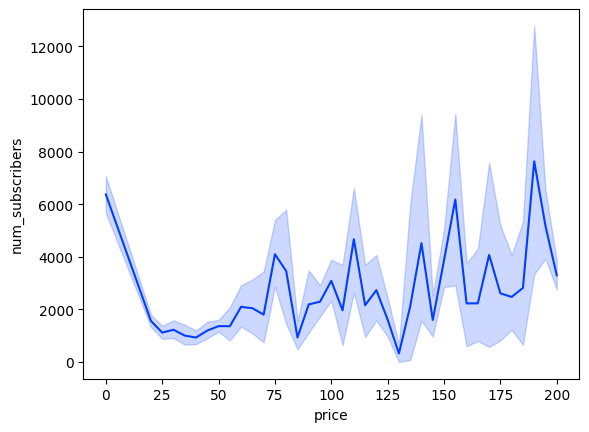

In [21]:
sns.lineplot(data=udemy_wo_dups, x="price", y="num_subscribers")
plt.show()

In [33]:
udemy_wo_dups.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'z_score', 'date',
       'year'],
      dtype='object')

In [22]:
udemy_wo_dups['year'] = pd.DatetimeIndex(udemy_wo_dups['date']).year

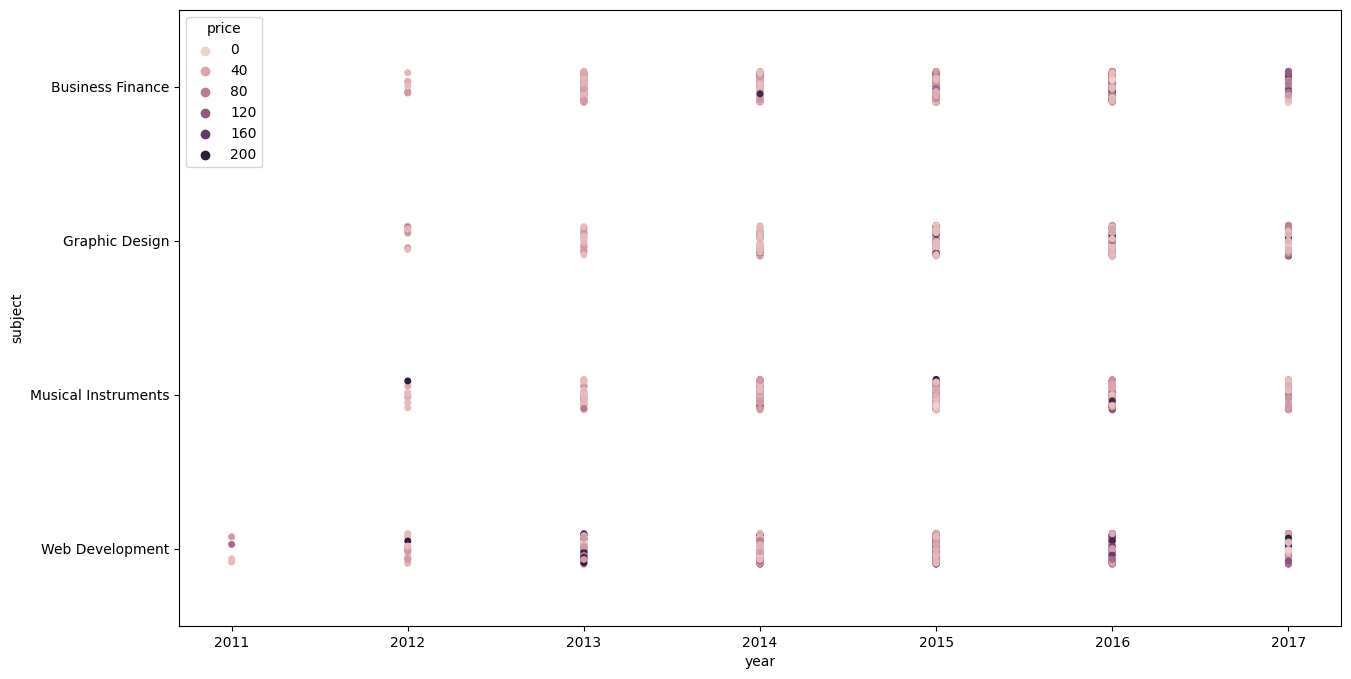

In [23]:
sns.stripplot(data=udemy_wo_dups, x='year', y="subject", hue='price')
plt.gcf().set_size_inches(15, 8)

In [24]:
subscribers_by_year = udemy_wo_dups.groupby(["year"])["num_subscribers"].sum()

In [25]:
subscribers_by_year

year
2011      49842
2012     250111
2013     635864
2014    1408074
2015    2685747
2016    2548770
2017     988941
Name: num_subscribers, dtype: int64

In [26]:
udemy_wo_dups.is_paid = udemy_wo_dups.is_paid.replace({True: 1, False: 0})

In [27]:
udemy_wo_dups

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,z_score,date,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,-0.110004,2017-01-18,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,-0.042015,2017-03-09,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,-0.107158,2016-12-19,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,-0.077959,2017-05-30,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,-0.201816,2016-12-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,-0.226692,2016-06-14,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,-0.304063,2017-03-10,2017
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,-0.282243,2015-12-30,2015
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,-0.304695,2016-08-11,2016


Grafico la relación entre suscriptores y los idstintos años.

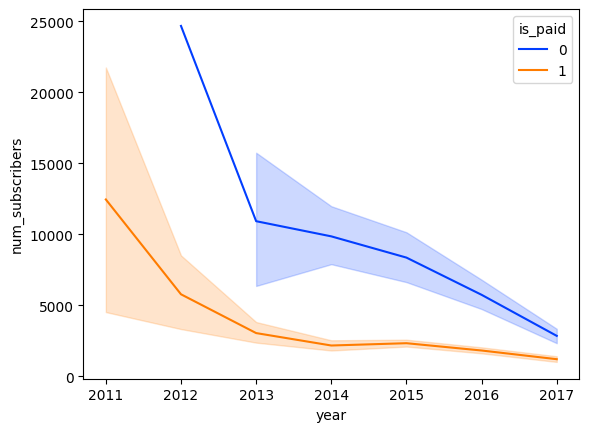

In [28]:
sns.lineplot(data=udemy_wo_dups, x="year", y="num_subscribers", hue='is_paid')
plt.show()

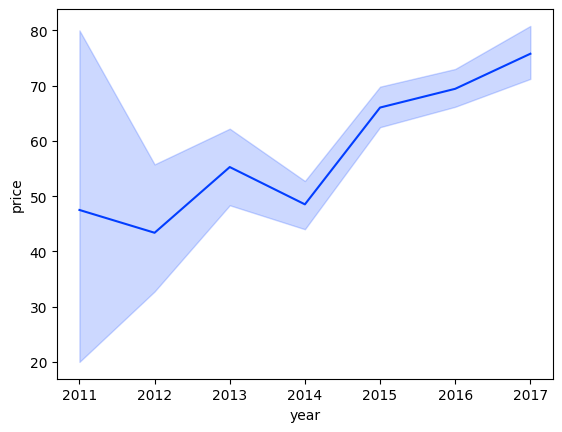

In [29]:
sns.lineplot(data=udemy_wo_dups, x="year", y='price')
plt.show()

In [50]:
df_is_paid_by_level = udemy_wo_dups.groupby(by=['level'], as_index=False)['subject'].count()
df_is_paid_by_level

,level,subject
0,All Levels,1890
1,Beginner Level,1255
2,Expert Level,58
3,Intermediate Level,421


In [30]:
udemy_wo_dups[['course_title', 'year']].value_counts()

course_title                                                  year
Creating an animated greeting card via Google Slides          2016    3
Acoustic Blues Guitar Lessons                                 2013    2
#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs  2014    1
Master Calendar Spreads with this live trade on Gold (GLD)    2013    1
Manipulate Photos with GIMP                                   2015    1
                                                                     ..
Financial Statements Made Easy                                2013    1
Financial Statements: Learn Accounting. Unlock the Numbers.   2016    1
Financial Translation                                         2014    1
Financial analysis: Compare performance of companies          2015    1
７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー                    2015    1
Length: 3621, dtype: int64

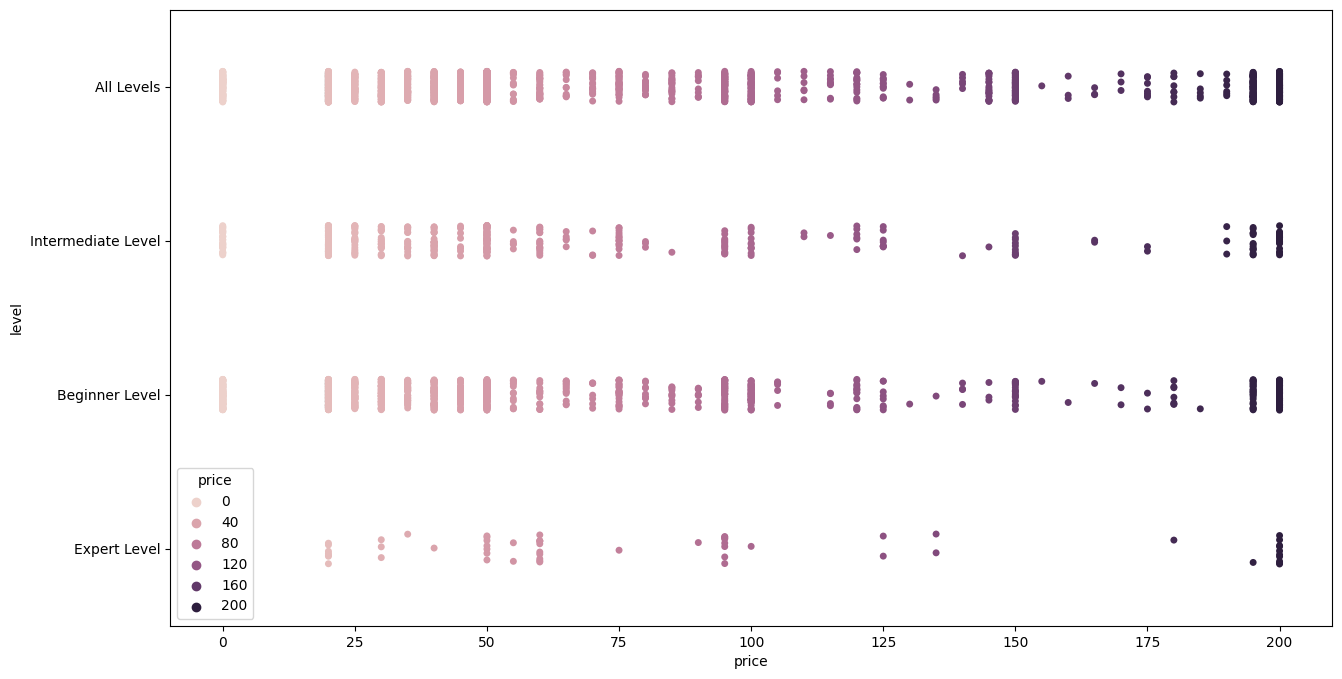

In [31]:
sns.stripplot(data=udemy_wo_dups, x='price', y="level", hue='price')
plt.gcf().set_size_inches(15, 8)

In [32]:
# udemy_wo_dups = udemy_wo_dups.to_csv('udemy_final.csv')

In [ ]:
df_languages= udemy_wo_dups['title'].apply(detect)